In [115]:
# importing essential libraries

import numpy as np 
# For visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# Processing and loading data
import tensorflow
from tensorflow import keras
# Data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# CNN Modellinig
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation
# Activation functions
from tensorflow.keras.activations import relu,softmax,sigmoid
# Optimizers
from tensorflow.keras.optimizers import Adam
# Reading the images
from tensorflow.keras.preprocessing import image

In [34]:
# Path for the train images and test images

train_path = './train/'
test_path = './test/'
valid_path = './valid/'

In [35]:
# ALl the size of the image should be same, assign the height and width of the image

img_height,img_width = 256,256

In [36]:
# Data Augmentation

train_gen = ImageDataGenerator(rescale = 1./255,rotation_range=0,
                                width_shift_range=0.3,
                                height_shift_range=0.3,
                                horizontal_flip=True,
                                vertical_flip=True,zoom_range=0.2)

# In test data we just do the scaling as this is going to be unseen data

test_gen = ImageDataGenerator(rescale = 1./255)

valid_gen = ImageDataGenerator(rescale = 1./255)

In [37]:
# Reading the images and appllying data augmentation on them from the folder

train = train_gen.flow_from_directory(train_path,
                                    target_size = (img_height,img_width),
                                    class_mode='binary',
                                    batch_size=32)

test = test_gen.flow_from_directory(test_path,
                                   target_size = (img_height,img_width),
                                    class_mode='binary',
                                    batch_size=32)

valid = valid_gen.flow_from_directory(valid_path,
                                   target_size = (img_height,img_width),
                                    class_mode='binary',
                                    batch_size=32)

Found 4000 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [38]:
# Printing the classes present in the folder and there labels

train_dict = train.class_indices
[print(key ,' : ',value)for key,value in train_dict.items()]

average  :  0
beautiful  :  1


[None, None]

In [39]:
test.class_indices

{'average': 0, 'beautiful': 1}

In [40]:
# Developing the model. Customized CNN

model = Sequential()

# Hidden Layer 1 
model.add(Conv2D(128,kernel_size=(3,3),input_shape=(img_height,img_width,3),padding='same',activation='relu'))
# Maxpooling layer 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden Layer 2
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
# Maxpooling layer 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Hidden Layer 3 
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
# Maxpooling layer 3
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten layer 
model.add(Flatten())
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(1,activation='sigmoid'))



In [46]:
# Compiling the model

model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])


In [104]:
# Fitting the model

model.fit(train,epochs = 50,batch_size = 32,verbose=1,validation_data = valid)

Epoch 1/50
 53/125 [===========>..................] - ETA: 12:47 - loss: 0.2649 - accuracy: 0.9009

KeyboardInterrupt: 

In [ ]:
# Model has been trained with 20 epochs and i got validation accuracy about 92 already
# Then i tried it with 50 epochs it was taking a long time so cancelled the runtime.


In [48]:
train_loss = model.history.history['loss']
train_acc = model.history.history['accuracy']
test_acc = model.history.history['val_accuracy']
test_loss = model.history.history['val_loss']

In [50]:
epochs = 20

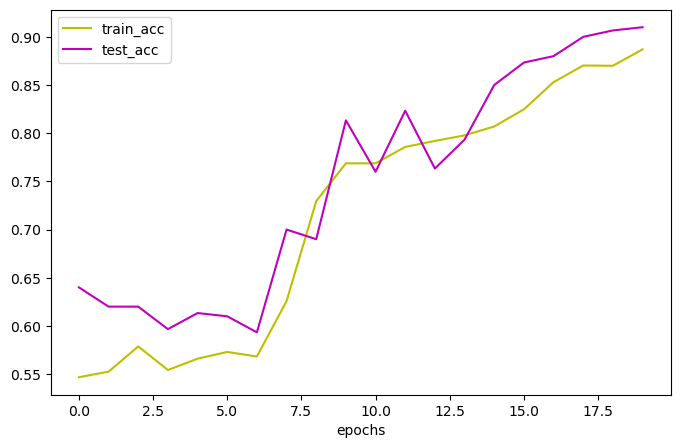

In [56]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(epochs),train_acc,color='y',label='train_acc')
plt.plot(np.arange(epochs),test_acc,color='m',label='test_acc')
plt.legend()
plt.xlabel('epochs')
plt.show()

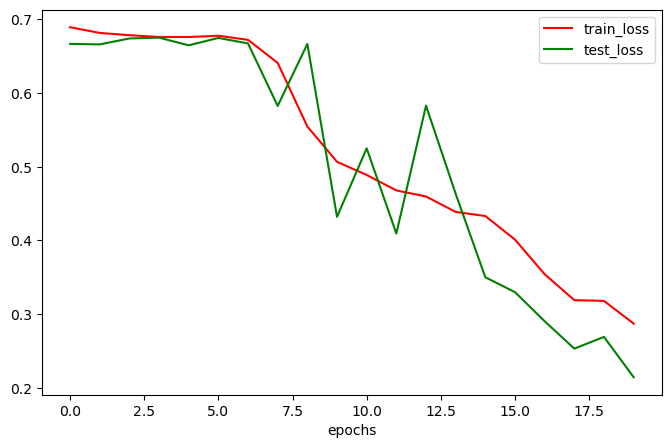

In [55]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(epochs),train_loss,color='r',label='train_loss')
plt.plot(np.arange(epochs),test_loss,color='g',label='test_loss')
plt.legend()
plt.xlabel('epochs')
plt.show()

In [57]:
# Evaluating the model on test data

loss,acc = model.evaluate(test)

10/10 [==============================] - 33s 3s/step - loss: 0.1642 - accuracy: 0.9267


In [127]:
# accuracy and loss are pretty good for test data too.

print('loss : ', loss)
print('Accuracy : ',  acc)

loss :  0.16424937546253204
Accuracy :  0.9266666769981384


In [60]:
train.class_indices

{'average': 0, 'beautiful': 1}

## 'average': 0, 'beautiful': 1

In [95]:
# Function for predicting the custom input

def fun(path):
    a = plt.imread(path)
    plt.imshow(a)
    
    image_pred = image.load_img(path,target_size=(img_height,img_width))
    image_pred = image.img_to_array(image_pred)
    a = np.expand_dims(image_pred,axis=0)
    result = model.predict(a)
    print(result)
    if result[0]<0.5:
        print('Predicted_result = Average')
    else:
        print('Predicted_result = Beautiful')

In [128]:
# Labels present in the data

labels = list(train.class_indices.keys())

['average', 'beautiful']

1/1 [==============================] - 3s 3s/step


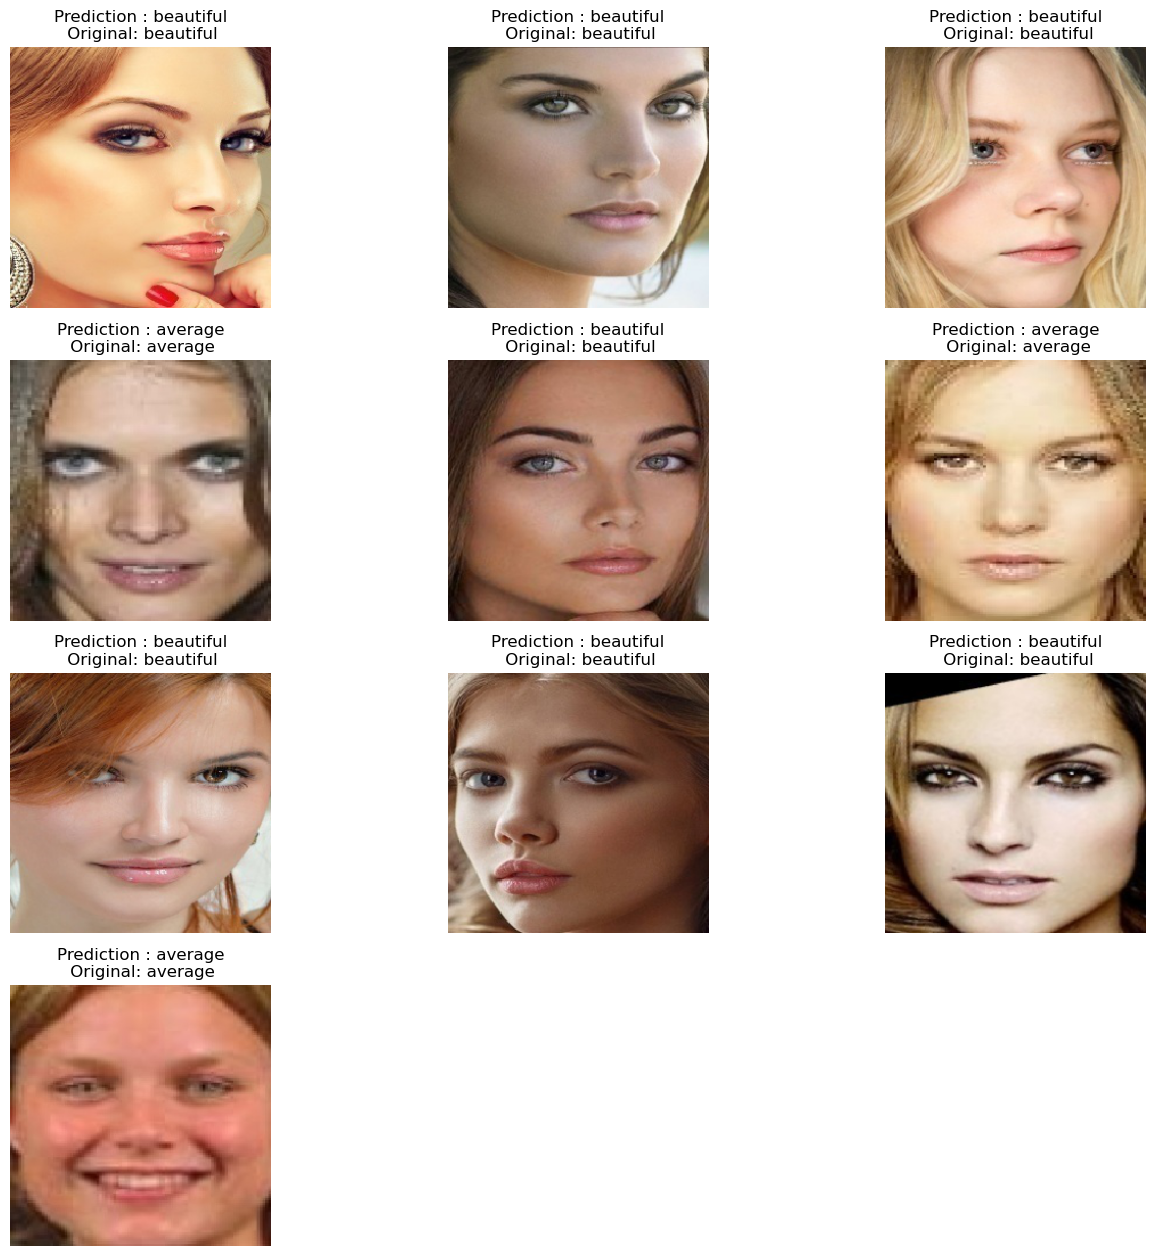

In [129]:

plt.figure(figsize=(16,16))

for i in range(10):

  image, label = test.next()

  model_pred = model.predict(image) 

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction : {labels[int(tf.round(model_pred[i]))]}\n Original: {labels[int(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")

1/1 [==============================] - 1s 682ms/step
[[1.]]
Predicted_result = Beautiful


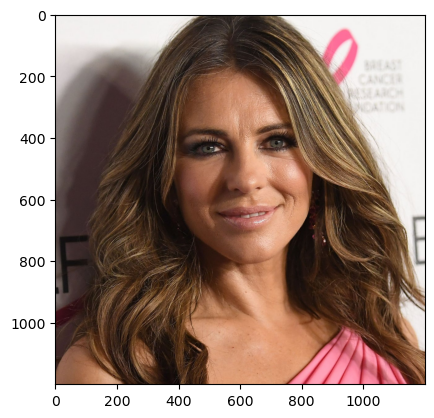

In [105]:
fun('C:/Users/piyus/Desktop/Ekeeda/Algo Pract/Untitled Folder/images to predict/1.jpg')

1/1 [==============================] - 2s 2s/step
[[1.]]
Predicted_result = Beautiful


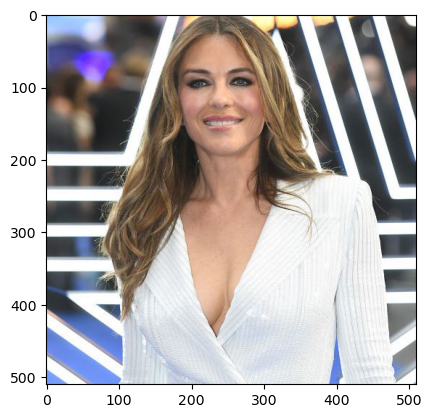

In [97]:
fun('C:/Users/piyus/Desktop/Ekeeda/Algo Pract/Untitled Folder/images to predict/4.jpg')